# Content Moderation and User Engagement Insights for Schools

##  Objective:

*Identify trends and behaviors related to content moderation, including how flagged, deleted, ignored, or reported content affects user engagement.*

*Provide actionable insights to improve the efficiency of content review processes and optimize engagement across the platform.*

## High-Level Findings

**Total Content:**

**50,000+** posts were analyzed across all students.

**Average Number of Posts Per Student:**

**540** posts on average per student.

**Average Percent of Flagged Content:**

**5%** of all content was flagged by our system for review. This suggests that students tend to have a more manageable portion of content that requires moderation. They may tend to have less of a past and therefore may be able to moderate their own content better than the average user. 

**Average Percent of Deleted Content (Flagged Content):**

**4%** of flagged content was deleted. This indicates that a small proportion of flagged content is deemed inappropriate by students. We do tend to be over sensative when flagging content so many flagged posts may not actually be "delete" worthy.

**Average Percent of Ignored Content (Flagged Content):**

**10%** of flagged content was ignored by students. Again, this raises questions about the effectiveness of flagged content. We can dive deeper into ignored content to see why that may not be perceived as harmful.

**Average Percent of Reported Content (Flagged Content):**

**0.04%** of flagged content was reported by students. This may suggest a lack of user awareness of the reporting feature. One idea is a "Tinder" app for posts where students can swipe left or right on posts. For marketing, we could host a **"Train our AI Day"** where we send emails out to students to try and get them back in and we tell them about these other features.  



## Data Visualization with Summary

### Bar Graph 1:

The chart below shows the timeframes in which students returned to update their flagged content after the initial scan. The majority of updates occurred on the same day the content was flagged, with **1,784** posts updated. A smaller number of updates happened after more than a week, accounting for **730** posts. Minimal activity was observed for updates the next day (45 posts) and within a week (25 posts).

**Key Insight:** The bulk of user updates happen immediately on the same day, with a smaller secondary group returning after an extended period of over a week.

![Returned Update Chart](https://github.com/calebkolman/data-analytics-portfolio/blob/main/notebooks/updated_days.png)

### Box Plot:

The box plot below visualizes the distribution of content updates after the first day. I also excluded 3 updates that took longer than 200 days for aesthetic purposes. The median number of days for updates is around 23 days, with most content being updated between 10 to 50 days. There are several outliers where content was updated either very quickly (within 10 days) or beyond 50 days.

**Key Insight:** While the bulk of content updates occur within 30 days, there are notable early and late outliers, suggesting varying levels of user engagement after the first day.

![Returned Update Chart](https://github.com/calebkolman/data-analytics-portfolio/blob/main/notebooks/boxplot_updated_content.png)

### Bar Graph 2:

This bar chart shows the distribution of how many different days students returned to update their content. The majority of students (81) returned to update their content on only 1 day, indicating limited engagement beyond the initial update. A few students returned on 2, 4, or 6 different days, suggesting minimal longer-term engagement in updating content.

**Key Insight:** Most students do not return multiple times to update content, with the vast majority only updating once.

![Returned Update Chart](https://github.com/calebkolman/data-analytics-portfolio/blob/main/notebooks/returned_update.png)

### Correlation Matrix:

The correlation matrix shows the relationships between different content actions (isFlagged, isDeleted, isIgnored, isReported) and the number of unique days students returned to update content (unique_update_days):

**isFlagged and isDeleted:** Moderately correlated (0.49), meaning flagged content is often deleted.

**isFlagged and unique_update_days:** Positive correlation (0.56), indicating flagged content is more likely to be updated across multiple days.

**isDeleted and unique_update_days: Strong correlation** (0.68), suggesting deleted content tends to be updated on more unique days.

**isIgnored:** Weak correlations with other actions, implying ignored content is less associated with further updates or actions.

**isReported:** No strong correlations with other actions or updates, indicating reporting is independent of other behaviors.

**Key Insight:** Deleting and flagging content are more strongly associated with students returning to update content over time. Ignored or reported content, however, shows minimal correlation with user return behavior.

![Returned Update Chart](https://github.com/calebkolman/data-analytics-portfolio/blob/main/notebooks/correlation_matrix.png)


## **Conclusion**

We looked at how students interact with flagged content and the actions they take in response, such as deleting, ignoring, or reporting content. The majority of flagged content is addressed same day and we saw a smaller portion of students return after a week or more to address flagged content.

The analysis also revealed that **10%** of flagged content is ignored vs. only **4%** is deleted, suggesting that much of the flagged content is either not deemed inappropriate or that the flagging system might be overly sensitive.

---

### **Potential Next Steps**

1. **Review Flagging Sensitivity**:  
   With **10%** of flagged content being ignored and only **4%** being deleted, it may be worth revisiting the sensitivity on flagging content to reduce false positives and ensure the system is flagging truly inappropriate content.

2. **User Education and Engagement**:  
   The low percentage of reported content (**0.04%**) suggests that students may not be fully aware of the reporting feature. Introducing new engagement strategies, such as a **"Train our AI Day"**, can encourage students to interact with the system more effectively while also educating them about the report feature. We may need to include other incentives for this though...

3. **Content Moderation Tools**:  
   Implementing more intuitive tools for students to moderate their own content, such as a **swipe interface** similar to apps like Tinder. This could make the moderation process faster and more engaging for students.

4. **Deep Dive into Ignored Content**:  
   Investigate why a significant portion of flagged content is ignored. This could involve analyzing patterns in the type of content that gets ignored or surveying users to understand why they chose not to take action.

5. **Monitor Long-Term Engagement**:  
   Given that most users return to update content only once, there could be opportunities to improve long-term engagement by sending **email reminders** about pending flagged content haven’t addressed.

---------------------
## Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('Content_Interaction.csv')

### Check the size and type of data

In [2]:
# Check data types
print(data.dtypes)

# Check the shape (number of rows and columns)
print(data.shape)

# Get summary statistics
print(data.describe(include='all'))


business_customer_id    object
id                      object
createdAt               object
updatedAt               object
isFlagged                 bool
isDeleted                 bool
isIgnored                 bool
isReported                bool
dtype: object
(51305, 8)
             business_customer_id                           id  \
count                       51305                        51305   
unique                         95                        47454   
top     clwi32kmt24940sqjtrh4tj4n  clr9vjes83209880is6pc22fqjt   
freq                         8940                            3   

                      createdAt                updatedAt isFlagged isDeleted  \
count                     51305                    50765     51305     51305   
unique                    41526                    40116         2         2   
top     2024-01-12 00:02:19.315  2023-11-03 15:07:31.217     False     False   
freq                          6                       51     48811     51107

In [3]:
# Calculate total content
total_content = data['id'].count()

# Group by 'business_customer_id' to count the number of posts for each user
posts_per_student = data.groupby('business_customer_id')['id'].count()

# Calculate the average number of posts per student
avg_posts_per_student = posts_per_student.mean()

# Print the total content and average posts per student in a professional format
print(f"Total Content Analyzed: {total_content:,}")
print(f"Average Number of Posts Per Student: {avg_posts_per_student:.2f}")

# Filter dataset where 'isFlagged' is True for further analysis
flagged_data = data[data['isFlagged'] == True]

# Calculate and print the overall percentage of flagged content
avg_flagged = data['isFlagged'].mean() * 100
print(f"Average Percentage of Flagged Content: {avg_flagged:.2f}%")

# Calculate and print the percentage of flagged content that was deleted
avg_deleted_flagged = flagged_data['isDeleted'].mean() * 100
print(f"Average Percentage of Deleted (Flagged Content): {avg_deleted_flagged:.2f}%")

# Calculate and print the percentage of flagged content that was ignored
avg_ignored_flagged = flagged_data['isIgnored'].mean() * 100
print(f"Average Percentage of Ignored (Flagged Content): {avg_ignored_flagged:.2f}%")

# Calculate and print the percentage of flagged content that was reported
avg_reported_flagged = flagged_data['isReported'].mean() * 100
print(f"Average Percentage of Reported (Flagged Content): {avg_reported_flagged:.2f}%")

Total Content Analyzed: 51,305
Average Number of Posts Per Student: 540.05
Average Percentage of Flagged Content: 4.86%
Average Percentage of Deleted (Flagged Content): 4.05%
Average Percentage of Ignored (Flagged Content): 10.30%
Average Percentage of Reported (Flagged Content): 0.04%


### Clean Data

In [4]:
# Drop rows with any missing values
data_cleaned = data.dropna()

# Filter the dataset to include only rows where action was taken
data_cleaned = data_cleaned[(data_cleaned['isFlagged'] == True) | 
                            (data_cleaned['isDeleted'] == True) | 
                            (data_cleaned['isReported'] == True) | 
                            (data_cleaned['isIgnored'] == True)]

### Calculating Time to Update: Creating a new column that calculates the time difference between createdAt and updatedAt. Going to analyze how long students take to update their posts

In [5]:
# Convert 'createdAt' and 'updatedAt' to datetime
data_cleaned['createdAt'] = pd.to_datetime(data_cleaned['createdAt'], errors='coerce')
data_cleaned['updatedAt'] = pd.to_datetime(data_cleaned['updatedAt'], errors='coerce')

# Calculate the difference in days between 'createdAt' and 'updatedAt'
data_cleaned['update_duration_days'] = (data_cleaned['updatedAt'] - data_cleaned['createdAt']).dt.days

# View the result to verify
print(data_cleaned[['createdAt', 'updatedAt', 'update_duration_days']].head())

                  createdAt               updatedAt  update_duration_days
21  2024-06-13 15:57:04.993 2024-06-13 15:58:04.447                   0.0
66  2024-06-13 15:57:04.145 2024-06-13 15:58:07.778                   0.0
75  2024-06-11 22:09:14.272 2024-06-13 15:57:03.350                   1.0
277 2024-06-01 14:07:47.346 2024-06-01 14:07:49.126                   0.0
320 2024-06-01 14:07:47.283 2024-06-01 14:07:47.744                   0.0


In [6]:
# Define a function to classify the date difference
def classify_update_duration(days):
    if days == 0:
        return 'Same Day'
    elif days == 1:
        return 'Next Day'
    elif days <= 7:
        return 'Within a Week'
    else:
        return 'More than a Week'

# Apply the classification to the cleaned dataset
data_cleaned['update_classification'] = data_cleaned['update_duration_days'].apply(classify_update_duration)

# View the first few rows to verify
print(data_cleaned[['createdAt', 'updatedAt', 'update_duration_days', 'update_classification']].head())


                  createdAt               updatedAt  update_duration_days  \
21  2024-06-13 15:57:04.993 2024-06-13 15:58:04.447                   0.0   
66  2024-06-13 15:57:04.145 2024-06-13 15:58:07.778                   0.0   
75  2024-06-11 22:09:14.272 2024-06-13 15:57:03.350                   1.0   
277 2024-06-01 14:07:47.346 2024-06-01 14:07:49.126                   0.0   
320 2024-06-01 14:07:47.283 2024-06-01 14:07:47.744                   0.0   

    update_classification  
21               Same Day  
66               Same Day  
75               Next Day  
277              Same Day  
320              Same Day  


In [7]:
# Count the occurrences of each classification
classification_counts = data_cleaned['update_classification'].value_counts()

# Display the counts
print(classification_counts)


update_classification
Same Day            1829
More than a Week     731
Within a Week         15
Next Day              10
Name: count, dtype: int64


In [8]:
# Convert the counts to a DataFrame
classification_counts_df = classification_counts.reset_index()
classification_counts_df.columns = ['Update Duration', 'Count']

# Display the result
print(classification_counts_df)


    Update Duration  Count
0          Same Day   1829
1  More than a Week    731
2     Within a Week     15
3          Next Day     10


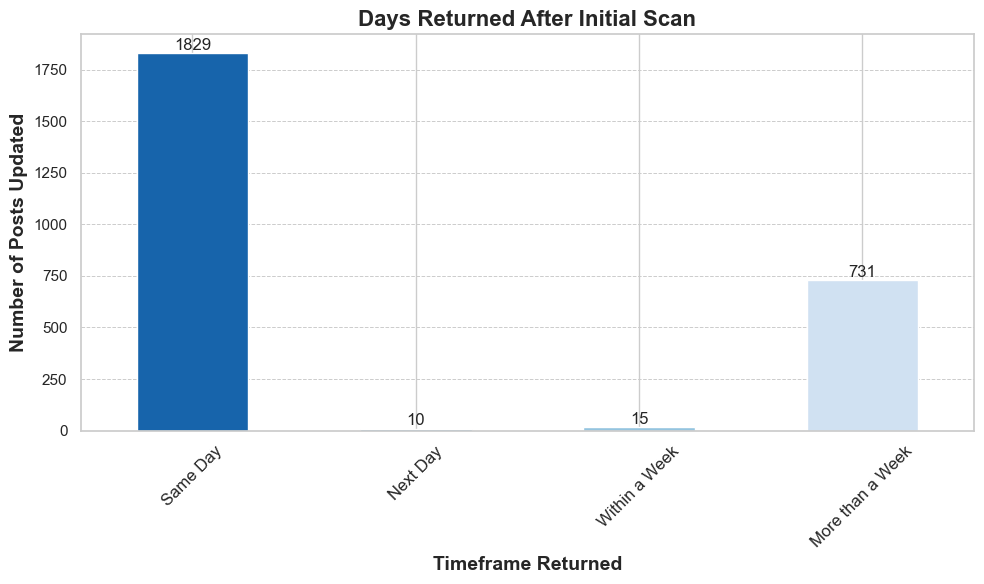

In [9]:
# Order the categories
classification_counts.index = pd.Categorical(classification_counts.index, 
                                             categories=["Same Day", "Next Day", "Within a Week", "More than a Week"], 
                                             ordered=True)

# Sort the values by the custom category order
classification_counts = classification_counts.sort_index()

# Set style
sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
classification_counts.plot(kind='bar', color=sns.color_palette("Blues_r", len(classification_counts)), ax=ax)

# Set title
plt.title('Days Returned After Initial Scan', fontsize=16, weight='bold')

# Set x and y labels
plt.xlabel('Timeframe Returned', fontsize=14, weight='bold')
plt.ylabel('Number of Posts Updated', fontsize=14, weight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12)

# Add gridlines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Add data labels
for idx, value in enumerate(classification_counts):
    ax.text(idx, value + 1, str(value), ha='center', va='bottom', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()


In [17]:
# Filter out updates that happened on the same day
content_after_1_day_filtered = data_cleaned[(data_cleaned['update_duration_days'] >= 1) & 
                                            (data_cleaned['update_duration_days'] <= 200)]
# View the filtered data
print(content_after_1_day_filtered[['createdAt', 'updatedAt', 'update_duration_days']].head())

                   createdAt               updatedAt  update_duration_days
75   2024-06-11 22:09:14.272 2024-06-13 15:57:03.350                   1.0
5830 2024-06-01 14:05:37.046 2024-06-03 18:45:30.186                   2.0
5837 2024-06-01 14:05:37.034 2024-06-03 18:45:22.982                   2.0
6070 2024-06-01 14:05:31.901 2024-06-03 01:09:30.256                   1.0
6085 2024-06-01 14:05:31.877 2024-06-03 01:09:27.639                   1.0


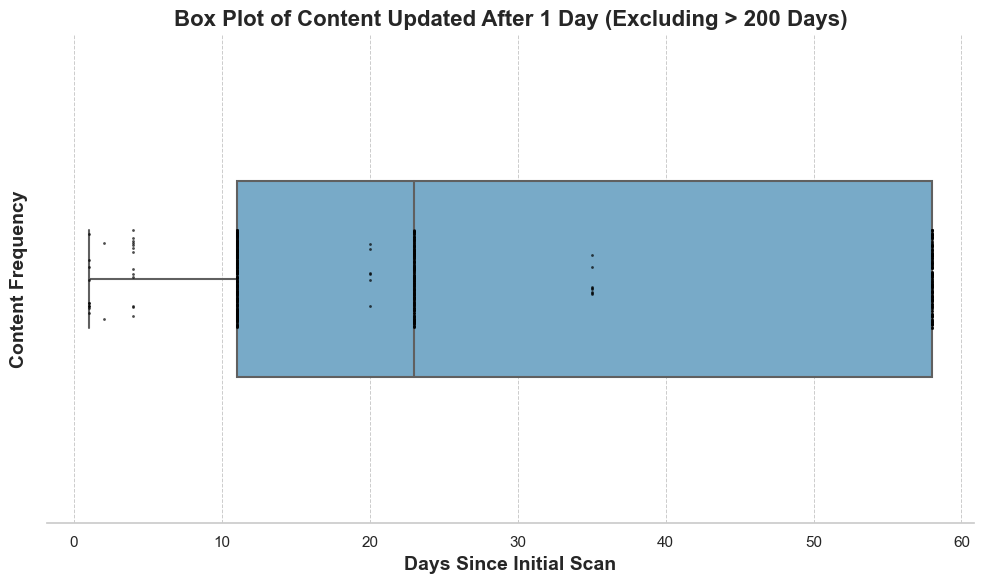

In [11]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(10, 6))

# Set color palette
sns.boxplot(x='update_duration_days', data=content_after_1_day_filtered, palette='Blues', width=0.4)

# Use stripplot to show points
sns.stripplot(x='update_duration_days', data=content_after_1_day_filtered, color='black', size=2, alpha=0.7)

# Customize gridlines for the x-axis only
plt.grid(True, which='major', axis='x', linestyle='--', linewidth=0.7)

# Set plot labels and title
plt.title('Box Plot of Content Updated After 1 Day (Excluding > 200 Days)', fontsize=16, weight='bold')
plt.xlabel('Days Since Initial Scan', fontsize=14, weight='bold')
plt.ylabel('Content Frequency', fontsize=14, weight='bold')

# Remove unnecessary spines
sns.despine(left=True)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

### Counting Unique Updates: check how many different days students returned to update their content.

In [12]:
# Convert 'updatedAt' to datetime and infer the format, then extract only the date
data['updatedAt'] = pd.to_datetime(data['updatedAt'], errors='coerce').dt.date
# Check if there are any missing or invalid dates after conversion
invalid_dates = data[data['updatedAt'].isna()]
print(invalid_dates[['business_customer_id', 'updatedAt']])

# Group by 'business_customer_id' and count the unique days (ignoring time)
user_update_counts = data.groupby('business_customer_id')['updatedAt'].nunique()

# View the result
print(user_update_counts.head())



              business_customer_id updatedAt
20     clxayc7ze7112380tqgd9bcdf7c       NaN
682     clww6mt1b164280tqgb8zfi05r       NaN
2081    clww6mt1b164280tqgb8zfi05r       NaN
2733    clww6mt1b164280tqgb8zfi05r       NaN
2734    clww6mt1b164280tqgb8zfi05r       NaN
...                            ...       ...
51296   cl8byne6q417960hs62kvbtlb9       NaN
51297   cl8byhw7g375200hs6v62ef22i       NaN
51298   cl8byne6q417960hs62kvbtlb9       NaN
51299   cl8byne6q417960hs62kvbtlb9       NaN
51300   cl8byne6q417960hs62kvbtlb9       NaN

[578 rows x 2 columns]
business_customer_id
ckyt17svq91170ks6i450jtx6      1
cl8byhw7g375200hs6v62ef22i     0
cl8byne6q417960hs62kvbtlb9     0
cl8byp828445000hs68oj42qef     0
cl8n31sj81651880is6g96gpwts    0
Name: updatedAt, dtype: int64


In [13]:
# Create a distribution of the number of days students returned to update their content
return_distribution = user_update_counts.value_counts().sort_index()

# View the distribution
print(return_distribution)


updatedAt
0     6
1    81
2     6
4     1
6     1
Name: count, dtype: int64


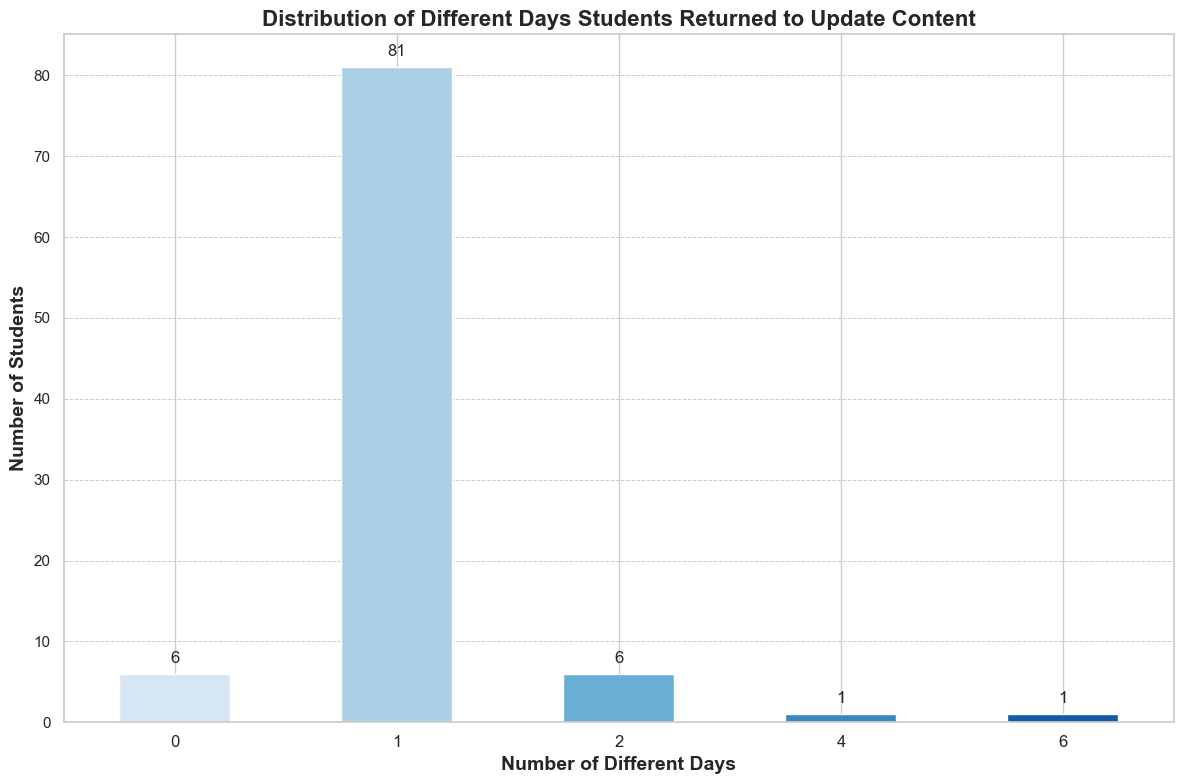

In [14]:
# Set style
sns.set(style="whitegrid")  # Clean white grid background

# Create a figure
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the figure size for readability

# Plot the distribution
return_distribution.plot(kind='bar', color=sns.color_palette("Blues", len(return_distribution)), ax=ax)

# Set plot title
plt.title('Distribution of Different Days Students Returned to Update Content', fontsize=16, weight='bold')

# Set axis labels
plt.xlabel('Number of Different Days', fontsize=14, weight='bold')
plt.ylabel('Number of Students', fontsize=14, weight='bold')

# Add gridlines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Rotate the x-axis labels
plt.xticks(rotation=0, fontsize=12)

# Add data labels
for idx, value in enumerate(return_distribution):
    ax.text(idx, value + 1, str(value), ha='center', va='bottom', fontsize=12)

# Display plot
plt.tight_layout()  # Ensures everything fits well
plt.show()


### Analyzing Flagged, Deleted, Ignored, Reported Content: Grouping by the business_customer_id and analyzing how these flags correlate with the update behavior.

In [15]:
# Group by 'business_customer_id' and calculate the sum of each flag
flagged_analysis = data.groupby('business_customer_id').agg({
    'isFlagged': 'sum',
    'isDeleted': 'sum',
    'isIgnored': 'sum',
    'isReported': 'sum',
    'updatedAt': 'nunique'  # Count unique 'updatedAt' days
}).reset_index()

# Rename 'updatedAt'
flagged_analysis.rename(columns={'updatedAt': 'unique_update_days'}, inplace=True)

# View the result
print(flagged_analysis.head())


          business_customer_id  isFlagged  isDeleted  isIgnored  isReported  \
0    ckyt17svq91170ks6i450jtx6          1          1          0           0   
1   cl8byhw7g375200hs6v62ef22i          0          0          0           0   
2   cl8byne6q417960hs62kvbtlb9          4          1          0           0   
3   cl8byp828445000hs68oj42qef          0          1          0           0   
4  cl8n31sj81651880is6g96gpwts          0          0          0           0   

   unique_update_days  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0  


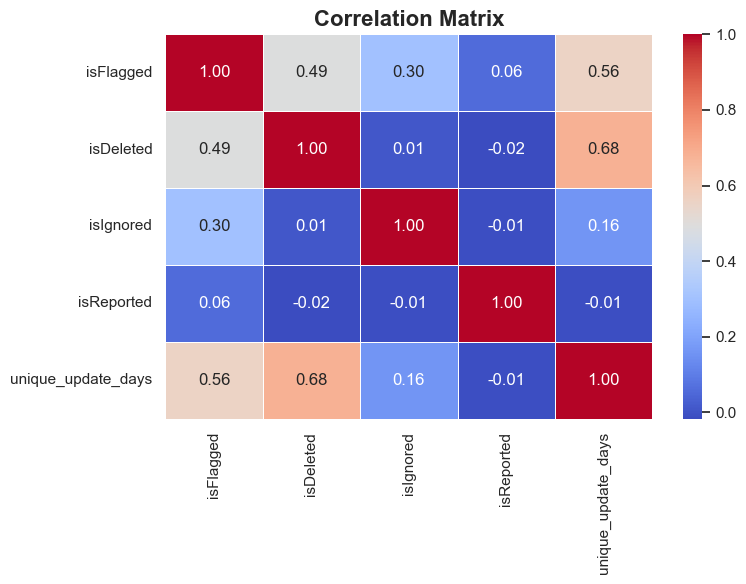

                    isFlagged  isDeleted  isIgnored  isReported  \
isFlagged            1.000000   0.489065   0.300041    0.056689   
isDeleted            0.489065   1.000000   0.008801   -0.016557   
isIgnored            0.300041   0.008801   1.000000   -0.011617   
isReported           0.056689  -0.016557  -0.011617    1.000000   
unique_update_days   0.558640   0.678781   0.160403   -0.012574   

                    unique_update_days  
isFlagged                     0.558640  
isDeleted                     0.678781  
isIgnored                     0.160403  
isReported                   -0.012574  
unique_update_days            1.000000  


In [16]:
# Correlation analysis between the flags and unique update days
correlation_matrix = flagged_analysis[['isFlagged', 'isDeleted', 'isIgnored', 'isReported', 'unique_update_days']].corr()

# Set up figure
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Add labels and title
plt.title('Correlation Matrix', fontsize=16, weight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# View the correlation matrix
print(correlation_matrix)
